In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,ZeroPadding2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.0.0-rc0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


# New Section

In [ ]:
test_data_dir='/content/dog-cat-full-dataset/data/test'
train_data_dir='/content/dog-cat-full-dataset/data/train'

In [ ]:

img_width=32
img_height=32
batch_size1=20

In [ ]:
datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=datagen.flow_from_directory(directory=train_data_dir,
                                            target_size=(img_width,img_height),
                                            classes=['dogs','cats'],
                                            class_mode='binary',
                                            batch_size=batch_size1)

Found 20000 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_generator=datagen.flow_from_directory(directory=test_data_dir,
                                            target_size=(32,32),
                                            classes=['dogs','cats'],
                                            class_mode='binary',
                                            batch_size=batch_size1)

Found 5000 images belonging to 2 classes.


In [ ]:
len(train_generator)

1000

BUILD A BASIC CNN MODEL

In [ ]:
  model=Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 121s 121ms/step - loss: 0.6522 - accuracy: 0.6179 - val_loss: 0.5768 - val_accuracy: 0.7032
Epoch 2/5
1000/1000 [==============================] - 119s 119ms/step - loss: 0.5525 - accuracy: 0.7175 - val_loss: 0.5387 - val_accuracy: 0.7336
Epoch 3/5
1000/1000 [==============================] - 119s 119ms/step - loss: 0.5097 - accuracy: 0.7491 - val_loss: 0.5318 - val_accuracy: 0.7334
Epoch 4/5
1000/1000 [==============================] - 120s 120ms/step - loss: 0.4734 - accuracy: 0.7735 - val_loss: 0.5445 - val_accuracy: 0.7198
Epoch 5/5
1000/1000 [==============================] - 120s 120ms/step - loss: 0.4411 - accuracy: 0.7908 - val_loss: 0.5918 - val_accuracy: 0.7196


In [ ]:
history.history

{'accuracy': [0.61785, 0.71755, 0.74915, 0.77355, 0.79075],
 'loss': [0.6521895705759525,
  0.5525018900632859,
  0.509730005338788,
  0.47342756724357604,
  0.44111807201802733],
 'val_accuracy': [0.7032, 0.7336, 0.7334, 0.7198, 0.7196],
 'val_loss': [0.5768481659889221,
  0.5387017613649369,
  0.5318254197835922,
  0.544489364027977,
  0.5917863860726357]}

In [ ]:
def plot_learning_curve(history):
##plot the training and Validation accuracy values
  epoch_range= range(1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

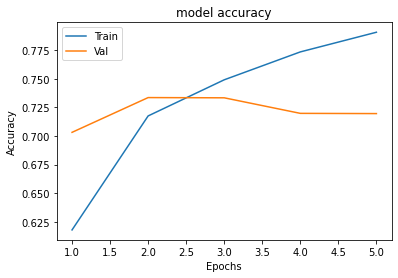

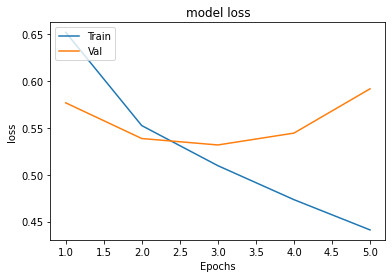

In [ ]:
plot_learning_curve(history)

IMPLEMENT FIRST 3 BLOCKS OF VGG MODEL

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model=Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])



In [ ]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 227s 227ms/step - loss: 0.6990 - accuracy: 0.5041 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/5
1000/1000 [==============================] - 225s 225ms/step - loss: 0.6935 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 225s 225ms/step - loss: 0.6934 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 226s 226ms/step - loss: 0.6935 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 226s 226ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5002


In [ ]:
def plot_learning_curve(history):
##plot the training and Validation accuracy values
  epoch_range= range(1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

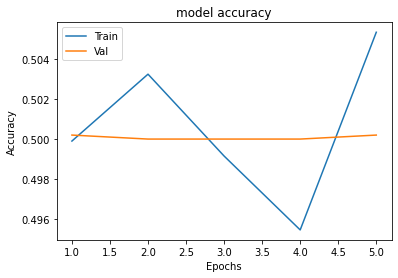

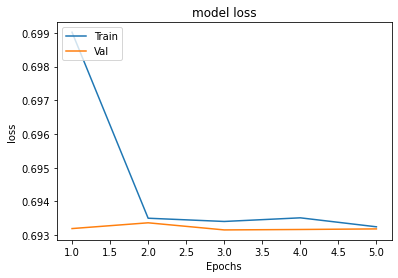

In [ ]:
plot_learning_curve(history)

BATCH NORMALIZATION AND DROPOUT

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model=Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=6,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/6
1000/1000 [==============================] - 382s 382ms/step - loss: 0.6876 - accuracy: 0.6037 - val_loss: 0.5856 - val_accuracy: 0.6940
Epoch 2/6
1000/1000 [==============================] - 380s 380ms/step - loss: 0.5975 - accuracy: 0.6837 - val_loss: 0.5716 - val_accuracy: 0.7094
Epoch 3/6
1000/1000 [==============================] - 379s 379ms/step - loss: 0.5588 - accuracy: 0.7178 - val_loss: 0.5414 - val_accuracy: 0.7326
Epoch 4/6
1000/1000 [==============================] - 380s 380ms/step - loss: 0.5352 - accuracy: 0.7324 - val_loss: 0.5221 - val_accuracy: 0.7442
Epoch 5/6
1000/1000 [==============================] - 380s 380ms/step - loss: 0.5133 - accuracy: 0.7484 - val_loss: 0.5486 - val_accuracy: 0.7360
Epoch 6/6
1000/1000 [==============================] - 379s 379ms/step - loss: 0.4955 - accuracy: 0.7599 - val_loss: 0.5220 - val_accuracy: 0.7436


In [ ]:
def plot_learning_curve(history):
##plot the training and Validation accuracy values
  epoch_range= range(1,7)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

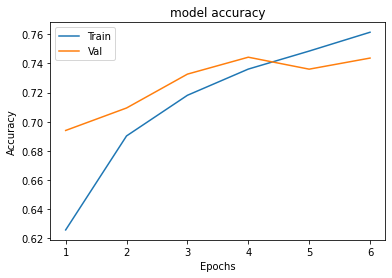

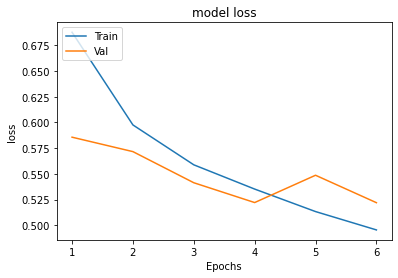

In [ ]:
plot_learning_curve(history)